In [2]:
import os 
import subprocess
import resource # for timing the subprocess
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import six
import time
import math

# Configure the use of PGF. Required pdflatex to be installed.
# Refer to https://timodenk.com/blog/exporting-matplotlib-plots-to-latex/
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family'  : 'serif',
#     'text.usetex'  : True,
#     'pgf.rcfonts'  : False,
# })

my_env = os.environ.copy()
my_env['DYLD_LIBRARY_PATH'] = "/Users/jasminexuereb/.opam/4.08.0/lib/z3" 
FNULL = open(os.devnull, 'w') # to hide console output of the subprocess

In [4]:
# initialize list of lists 
# data = [[1, 0.3286395, 0.6484685],[5, 1.940188, 4.663278999999999], [10, 27.780655, 338.726325]] 
data = pd.read_csv("RunningTimes.csv")

# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Complexity', 'Choice', 'Recursion','NestedIFs']) 
df['Complexity'] = df.index+1
df

,Complexity,Choice,Recursion,NestedIFs
0,1,0.047918,0.064463,0.030400
1,2,0.069444,0.106884,0.228360
2,3,0.096873,0.160646,0.483390
3,4,0.133375,0.237203,1.125433
4,5,0.189547,0.340743,4.530583
5,6,0.273126,0.549273,86.858997
6,7,0.467460,0.884770,inf
7,8,0.700918,1.468107,inf
8,9,1.249206,2.496344,inf
9,10,2.307203,4.522631,inf


In [5]:
def roundup(x):
    return int(math.ceil(x / 100.0)) * 100

In [11]:
# Creates three subplots and unpacks the output array immediately
# maybe switch to grid
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
f.set_figheight(3)
f.set_figwidth(12)
f.tight_layout(pad=3.0)

complexity = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["Recursion"])
ax1.plot(df['Complexity'], df['Recursion'], marker='o', color='g')
ax1.set_title('Recursion')
ax1.set_xlabel("Complexity")
ax1.set_ylabel("Time (s)")
# ax1.locator_params(axis='y', nbins=5)
ax1.set_xticks(np.arange(min(complexity['Complexity']), max(complexity['Complexity'])+1, 2))
# ax1.set_yticks(np.arange(0, max(df['Recursion'])+0.25, 0.25))

complexity = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["Choice"])
ax2.plot(df['Complexity'], df['Choice'], marker='o', color='b')
ax2.set_title('Choice')
ax2.set_xlabel("Complexity")
ax2.set_ylabel("Time (s)")
#specify the number of ticks on both or any single axes
# ax2.locator_params(axis='x', nbins=10)
# ax2.set_yticks(np.arange(0, max(df['Choice'])+0.25, 0.25))
ax2.set_xticks(np.arange(min(df['Complexity']), max(df['Complexity'])+1, 2))
    
complexity = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["NestedIFs"])
ax3.plot(df['Complexity'], df['NestedIFs'], marker='o', color='r')
ax3.set_title('Nested IFs')
ax3.set_xlabel("Complexity")
ax3.set_ylabel("Time (s)")
ax3.set_xticks(np.arange(min(complexity['Complexity']), max(complexity['Complexity'])+1, 1))
# ax3.set_yticks(np.arange(0, roundup(max(complexity['NestedIFs']))+1, 300))

f.savefig('Figure.pgf')
# f.savefig('Figure.png')

In [7]:
z = np.polyfit(complexity['Complexity'], complexity['NestedIFs'], 2)
z

array([  7.55808482, -40.11540241,  41.3158158 ])

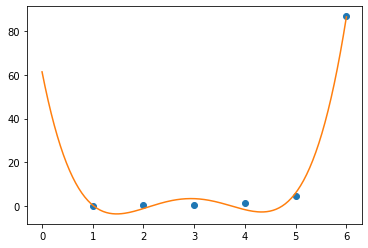

      4        3         2
1.58 x - 18.4 x + 73.92 x - 118.2 x + 61.39


In [54]:
np.random.seed(12)

x = complexity['Complexity']
y = complexity['NestedIFs']
p = np.poly1d(np.polyfit(x, y, 4))

# start,stop,num spaces
t = np.linspace(0, 6, 200)
plt.plot(x, y, 'o', t, p(t), '-')
plt.show()
print(p)

,Complexity,Choice,Recursion,NestedIFs
0,1,0.047918,0.064463,0.030400
1,2,0.069444,0.106884,0.228360
2,3,0.096873,0.160646,0.483390
3,4,0.133375,0.237203,1.125433
4,5,0.189547,0.340743,4.530583


In [43]:
def compute_rc(x):
    summation = sum(range(2,x+3))
    result = summation-3
    return result
def compute_sc(x):
    return (math.pow(2,x))
def compute_o_sc(x):
    return (int(math.factorial(x+2)/3))

In [60]:
end = 10
complexity_list = [1]
rc_list = [2]
sc_list = [4]
o_sc_list = [2]
for i in range (2,end):
    complexity_list.append(i)
    rc = compute_rc(i)
    rc_list.append(rc)
    sc_list.append(compute_sc(rc))
    o_sc_list.append(compute_o_sc(i))

In [18]:
data = {'#Relevant_Conditions': rc_list, '#Sat_Combinations':sc_list, '#Optimised_Sat_Combinations': o_sc_list}
print(df.to_latex(index = False))

\begin{tabular}{rrr}
\toprule
 \#Relevant\_Conditions &  \#Sat\_Combinations &  \#Optimised\_Sat\_Combinations \\
\midrule
                    2 &       4.000000e+00 &                            2 \\
                    6 &       6.400000e+01 &                            8 \\
                   11 &       2.048000e+03 &                           40 \\
                   17 &       1.310720e+05 &                          240 \\
                   24 &       1.677722e+07 &                         1680 \\
                   32 &       4.294967e+09 &                        13440 \\
                   41 &       2.199023e+12 &                       120960 \\
                   51 &       2.251800e+15 &                      1209600 \\
                   62 &       4.611686e+18 &                     13305600 \\
\bottomrule
\end{tabular}

